## 1 Load the dataset

In [ ]:
!unzip -q '/content/archive.zip' -d '/content'

In [ ]:
import os
print(os.listdir("/content"))
import warnings
warnings.filterwarnings('ignore')

['.config', 'archive.zip', 'IMDB Dataset.csv', 'sample_data']


In [ ]:
#importing the training data
import pandas as pd
imdb_data=pd.read_csv('/content/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## 2 Pre-Processing of Raw Data

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
df = pd.DataFrame(imdb_data)
df.columns=['review','label']
df.head()

,review,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.describe()

,review,label
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
from nltk.corpus import stopwords
stopword_list=stopwords.words('english')

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text 
def denoise_text(text): 
    text = strip_html(text) 
    text = remove_between_square_brackets(text)  
    return text  
#Apply function on review column   
df['review']=df['review'].apply(denoise_text)   

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review']=df['review'].apply(remove_special_characters)

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

{'hers', "hasn't", 'the', 've', 'didn', 'once', 'shouldn', 'to', "aren't", 'its', "couldn't", 'they', 'hasn', 'been', "isn't", 'haven', 'doing', 'from', 'them', 'hadn', 'on', 'this', 'his', 'theirs', 'down', 'which', 's', 'or', 'o', 'few', 'we', 'am', 'here', 'mightn', 'so', 'what', 'during', 'up', 'ours', 'for', 'in', 'by', 'i', 'himself', 'where', "it's", 'should', 'ain', 'doesn', 'myself', 'weren', 'he', 'who', 'only', 'wasn', 'being', 'd', 'if', "mightn't", 'now', 'do', 'll', 'ourselves', 'nor', 'all', 'it', "you'll", 'but', "wasn't", 'these', 'how', "haven't", 're', 'aren', "doesn't", 'won', 'again', "you're", 'is', 'each', 'yours', 'your', "hadn't", "she's", "you've", 'had', 'other', 'needn', "you'd", 'through', 'was', "don't", 'me', 'not', 'yourself', 'herself', 'too', 'off', 'at', 'can', 'have', 'no', 'any', 'then', 'there', 'with', 'against', 'themselves', 'my', 'and', 'as', 'under', 'ma', "that'll", 'after', 'whom', 'yourselves', 'own', 'some', "won't", 'same', 'between', 'ha

In [ ]:
df.head()

,review,label
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically theres family little boy Jake thinks...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


In [ ]:
df2 = df.copy()
df2.label[df2.label=="positive"] = 1
df2.label[df2.label=='negative'] = 0
df2.head()

,review,label
0,One reviewers mentioned watching 1 Oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,Basically theres family little boy Jake thinks...,0
4,Petter Matteis Love Time Money visually stunni...,1


### loading Extra Testing Sets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load(path, split, load_labels=True):
    data = pd.read_csv(f'{path}/{split}.csv')
    data.columns=['title','review','label']
    data=data.drop(columns=['title'])
    data['review']=data['review'].apply(denoise_text)
    data['review']=data['review'].apply(remove_special_characters)
    data['review']=data['review'].apply(remove_stopwords)
    data.label[data.label=="positive"] = 1
    data.label[data.label=='negative'] = 0
    return data

In [ ]:
path_genre='/content/drive/MyDrive/475_Project_MoiveReview/movie_genre/'
path_runtime='/content/drive/MyDrive/475_Project_MoiveReview/movie_runtime/'

In [ ]:
runtime_1_100=load(path=path_runtime, split='runtime_1_100') 

In [ ]:
runtime_101_600=load(path=path_runtime, split='runtime_101_600') 

In [ ]:
action=load(path=path_genre, split='action') 

In [ ]:
adventure=load(path=path_genre, split='adventure') 

In [ ]:
animation=load(path=path_genre, split='animation') 

In [ ]:
biopraphy=load(path=path_genre, split='biography') 

In [ ]:
comedy=load(path=path_genre, split='comedy')

In [ ]:
horror=load(path=path_genre,split='horror')

In [ ]:
romance=load(path=path_genre,split='romance')

In [ ]:
scifi=load(path=path_genre,split='scifi')

## 3 Split into Train-Valid-Test

In [ ]:
np.random.seed(2020)

In [ ]:
from sklearn.model_selection import train_test_split
X_tv, X_test, y_tv, y_test = train_test_split(df2['review'], df2['label'], test_size=0.15,random_state=0) # 15% data for testing

In [220]:
X_test.head()

11841    John Cassavetes run law bottom heap sees Negro...
19602    movie lame movie unnecessary need another West...
45519    Well werent Ethel Waters 7yearold Sammy Davis ...
25747    find Alan Jacobs review accurate concerning mo...
42642    movie simply awesome hilarious Although skatin...
Name: review, dtype: object

In [ ]:
X_tv_c=X_tv.reset_index()
X_tv_c=X_tv_c.drop(['index'], axis=1)
y_tv_c = y_tv.reset_index()
y_tv_c = y_tv_c.drop(['index'], axis=1)

In [ ]:
X_tv = X_tv_c['review']
y_tv = y_tv_c['label']

In [ ]:
import numpy as np
from sklearn.model_selection import PredefinedSplit
index_valid = np.random.choice(range(len(X_tv_c)), int(len(X_tv_c)*15/85),replace=False)
index_train = [ele for ele in range(len(X_tv_c)) if ele not in index_valid]
split_index = [-1 if ele not in index_valid else 0 for ele in range(len(X_tv_c)) ]

In [ ]:
pds = PredefinedSplit(test_fold=split_index)
X_train = X_tv_c.iloc[index_train]
y_train = y_tv_c.iloc[index_train]
X_valid = X_tv_c.iloc[index_valid]
y_valid = y_tv_c.iloc[index_valid]

In [ ]:
X_train = X_train['review']
y_train = y_train['label']
X_valid = X_valid['review']
y_valid = y_valid['label']

## 4.1 Data Exploration: Word Frequency

In [ ]:
X_train_freq_word= X_train.apply(lambda x: len(str(x).split()))
X_train_unique_freq_word = X_train.apply(lambda x: len(set(str(x).split()))) 

median of word frequency:  89.0
median of uniuqe word frequency:  78.0


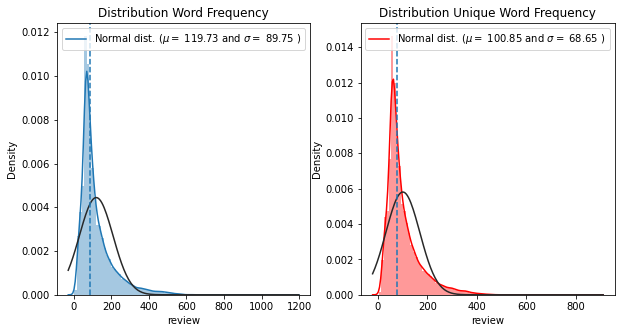

In [ ]:
from scipy import stats
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

sns.distplot(X_train_freq_word, bins = 90, ax=axes[0], fit = stats.norm)
(mu0, sigma0) = stats.norm.fit(X_train_freq_word)
axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
axes[0].set_title("Distribution Word Frequency")
axes[0].axvline(X_train_freq_word.median(), linestyle='dashed')
print("median of word frequency: ", X_train_freq_word.median())


sns.distplot(X_train_unique_freq_word, bins = 90, ax=axes[1], color = 'r', fit = stats.norm)
(mu1, sigma1) = stats.norm.fit(X_train_unique_freq_word)
axes[1].set_title("Distribution Unique Word Frequency")
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
axes[1].axvline(X_train_unique_freq_word.median(), linestyle='dashed')
print("median of uniuqe word frequency: ", X_train_unique_freq_word.median())

## 4.2 Tfidf Vectorization Fit and Transformation

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

In [262]:
tfidf_vec = TfidfVectorizer(sublinear_tf = True, min_df=5, max_features = 1500)
tfidf_fit = tfidf_vec.fit(X_train) # perform the tfidf feature engineering only on the training set

In [263]:
X_train_tfidf = tfidf_fit.transform(X_train)
X_valid_tfidf = tfidf_fit.transform(X_valid)
X_tv_tfidf = tfidf_fit.transform(X_tv)

In [264]:
X_train_tfidf.shape

(35000, 1500)

In [265]:
vocab_tfidf = tfidf_vec.get_feature_names()

In [266]:
print(vocab_tfidf)

['10', '100', '12', '15', '20', '30', '70s', '80s', '90', 'ability', 'able', 'absolute', 'absolutely', 'accent', 'across', 'act', 'acted', 'acting', 'action', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'adaptation', 'add', 'added', 'addition', 'adds', 'admit', 'adult', 'adults', 'adventure', 'affair', 'age', 'agent', 'ago', 'agree', 'ahead', 'air', 'alien', 'alive', 'allowed', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'amazing', 'america', 'american', 'americans', 'among', 'amount', 'amusing', 'angry', 'animals', 'animated', 'animation', 'annoying', 'another', 'answer', 'anymore', 'anyone', 'anything', 'anyway', 'apart', 'apparently', 'appeal', 'appear', 'appearance', 'appeared', 'appears', 'appreciate', 'approach', 'area', 'arent', 'army', 'around', 'art', 'artistic', 'aside', 'ask', 'asked', 'aspect', 'aspects', 'atmosphere', 'attack', 'attempt', 'attempts', 'attention', 'attractive', 'audience', 'audiences', 'available', 'aver

In [267]:
print("Vocabulary length:", len(vocab_tfidf))

Vocabulary length: 1500


In [268]:
dist = np.sum(X_train_tfidf, axis=0)
tfidf_dict = pd.DataFrame(dist,columns = vocab_tfidf)

In [269]:
tfidf_score=tfidf_dict.T
tfidf_score.columns=['tfidfscore']
tfidf_score.sort_values(by=['tfidfscore'], ascending=False)[:30]

,tfidfscore
movie,1843.980008
film,1622.581414
one,1315.324304
like,1155.835807
good,1032.563317
see,896.793586
even,890.822372
would,890.627754
really,887.135275
time,882.141362


In [270]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=400, n_iter=30, random_state=2020)
svd_tfidf_fit = svd.fit(X_train_tfidf)
X_tv_tfidf = svd_tfidf_fit.transform(X_tv_tfidf)

In [271]:
X_train_tfidf = svd_tfidf_fit.transform(X_train_tfidf)
X_valid_tfidf = svd_tfidf_fit.transform(X_valid_tfidf)

In [272]:
y_valid_int=y_valid.astype('int')
y_train_int=y_train.astype('int')

In [273]:
y_valid_2= pd.get_dummies(y_valid).values
y_train_2= pd.get_dummies(y_train).values

### Tranform Test data

In [274]:
X_test_tfidf = tfidf_fit.transform(X_test)
X_test_tfidf = svd_tfidf_fit.transform(X_test_tfidf)

In [275]:
y_test_int=y_test.astype('int')
y_tv_int=y_tv.astype('int')

In [276]:
def tfidfvecX(data):
  data_X= tfidf_fit.transform(data['review'])
  data_X = svd_tfidf_fit.transform(data_X)
  return data_X

In [277]:
X_tfidf_runtime_1_100=tfidfvecX(runtime_1_100)
X_tfidf_runtime_101_600=tfidfvecX(runtime_101_600)
X_tfidf_action=tfidfvecX(action)
X_tfidf_adventure=tfidfvecX(adventure)
X_tfidf_animation=tfidfvecX(animation)
X_tfidf_biography=tfidfvecX(biopraphy)
X_tfidf_comedy=tfidfvecX(comedy)
X_tfidf_horror=tfidfvecX(horror)
X_tfidf_romance=tfidfvecX(romance)
X_tfidf_scifi=tfidfvecX(scifi)

In [278]:
y_runtime_1_100=runtime_1_100['label'].astype('int')
y_runtime_101_600=runtime_101_600['label'].astype('int')
y_action=action['label'].astype('int')
y_adventure=adventure['label'].astype('int')
y_animation=animation['label'].astype('int')
y_biography=biopraphy['label'].astype('int')
y_comedy=comedy['label'].astype('int')
y_horror=horror['label'].astype('int')
y_romance=romance['label'].astype('int')
y_scifi=scifi['label'].astype('int')

## Fitting Models

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

### tfidf+logistic

In [ ]:
lr = LogisticRegression(random_state = 2020)
lr_para_grid = {
    'penalty':['l1','l2'],
    'C':[0.1, 1, 10, 15, 20],
    'solver':['newton-cg','lbfs','liblinear','sag','saga']
    }

tfidf_lr_gs = GridSearchCV(lr, param_grid = [lr_para_grid], cv = pds, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
tfidf_lr_gs.fit(X_tv_tfidf, y_tv_int)

Fitting 1 folds for each of 50 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0, -1])),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2020, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 15, 20], 'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfs', 'liblinear', 'sag',
                                     'saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       

In [ ]:
tfidf_lr_best = tfidf_lr_gs.best_estimator_
print(tfidf_lr_gs.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
print(tfidf_lr_gs.best_score_)

0.9342795523701504


In [ ]:
y_pred_tfidf_lr_test = tfidf_lr_best.predict(X_test_tfidf)
y_pred_tfidf_lr_runtime_1_100=tfidf_lr_best.predict(X_tfidf_runtime_1_100)
y_pred_tfidf_lr_runtime_101_600=tfidf_lr_best.predict(X_tfidf_runtime_101_600)
y_pred_tfidf_lr_action=tfidf_lr_best.predict(X_tfidf_action)
y_pred_tfidf_lr_adventure=tfidf_lr_best.predict(X_tfidf_adventure)
y_pred_tfidf_lr_animation=tfidf_lr_best.predict(X_tfidf_animation)
y_pred_tfidf_lr_biography=tfidf_lr_best.predict(X_tfidf_biography)
y_pred_tfidf_lr_comedy=tfidf_lr_best.predict(X_tfidf_comedy)
y_pred_tfidf_lr_horror=tfidf_lr_best.predict(X_tfidf_horror)
y_pred_tfidf_lr_romance=tfidf_lr_best.predict(X_tfidf_romance)
y_pred_tfidf_lr_scifi=tfidf_lr_best.predict(X_tfidf_scifi)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def evaluate_pred(ytrue, ypred):
  TN, FP, FN, TP = confusion_matrix(ytrue, ypred).ravel()
  Accuracy = round((TP + TN)/(TP + TN + FP + FN),3)
  Precision = round(TP/(TP + FP),3)
  Recall = round(TP/(TP + FN),3)
  Specificity = round(TN/(TN + FP),3)
  FPR = round(FP/(FP + TN),3)
  F1 = round(2*(Precision * Recall)/(Precision + Recall),3)
  Balanced_Accuracy = round((Precision + Specificity)/2,3)
  print("TP = "+str(TP))
  print("FP = "+str(FP))
  print("FN = "+str(FN))
  print("TN = "+str(TN))
  print("Accuracy = "+str(Accuracy))
  print("Precision = "+str(Precision))
  print("Recall = "+str(Recall))
  print("Specificity = "+str(Specificity))
  print("False_Positive_Rate = "+str(FPR))
  print("F1_Score = "+str(F1))
  print("Balanced_Accuracy = "+str(Balanced_Accuracy))
  res=pd.DataFrame([TN, FP, FN, TP, Accuracy, Precision, Recall, Specificity, FPR, F1, Balanced_Accuracy])
  return(res)

In [ ]:
res_tfidf_lr_test=evaluate_pred(y_test_int, y_pred_tfidf_lr_test)
#res_tfidf_lr=res_tfidf_lr_test

TP = 3217
FP = 570
FN = 487
TN = 3226
Accuracy = 0.859
Precision = 0.849
Recall = 0.869
Specificity = 0.85
False_Positive_Rate = 0.15
F1_Score = 0.859
Balanced_Accuracy = 0.849


In [ ]:
res_tfidf_lr_runtime_1_100=evaluate_pred(y_runtime_1_100, y_pred_tfidf_lr_runtime_1_100)
#res_tfidf_lr.append(res_tfidf_lr_runtime_1_100)

TP = 184
FP = 86
FN = 66
TN = 164
Accuracy = 0.696
Precision = 0.681
Recall = 0.736
Specificity = 0.656
False_Positive_Rate = 0.344
F1_Score = 0.707
Balanced_Accuracy = 0.669


In [ ]:
res_tfidf_lr_runtime_101_600=evaluate_pred(y_runtime_101_600, y_pred_tfidf_lr_runtime_101_600)

TP = 209
FP = 102
FN = 41
TN = 148
Accuracy = 0.714
Precision = 0.672
Recall = 0.836
Specificity = 0.592
False_Positive_Rate = 0.408
F1_Score = 0.745
Balanced_Accuracy = 0.632


In [ ]:
res_tfidf_lr_action=evaluate_pred(y_action, y_pred_tfidf_lr_action)

TP = 185
FP = 77
FN = 65
TN = 173
Accuracy = 0.716
Precision = 0.706
Recall = 0.74
Specificity = 0.692
False_Positive_Rate = 0.308
F1_Score = 0.723
Balanced_Accuracy = 0.699


In [ ]:
res_tfidf_lr_adventure=evaluate_pred(y_adventure, y_pred_tfidf_lr_adventure)

TP = 203
FP = 85
FN = 47
TN = 165
Accuracy = 0.736
Precision = 0.705
Recall = 0.812
Specificity = 0.66
False_Positive_Rate = 0.34
F1_Score = 0.755
Balanced_Accuracy = 0.682


In [ ]:
res_tfidf_lr_animation=evaluate_pred(y_animation, y_pred_tfidf_lr_animation)

TP = 106
FP = 55
FN = 10
TN = 61
Accuracy = 0.72
Precision = 0.658
Recall = 0.914
Specificity = 0.526
False_Positive_Rate = 0.474
F1_Score = 0.765
Balanced_Accuracy = 0.592


In [ ]:
res_tfidf_lr_biography=evaluate_pred(y_biography, y_pred_tfidf_lr_biography)

TP = 204
FP = 121
FN = 27
TN = 110
Accuracy = 0.68
Precision = 0.628
Recall = 0.883
Specificity = 0.476
False_Positive_Rate = 0.524
F1_Score = 0.734
Balanced_Accuracy = 0.552


In [ ]:
res_tfidf_lr_comedy=evaluate_pred(y_comedy, y_pred_tfidf_lr_comedy)

TP = 211
FP = 92
FN = 39
TN = 158
Accuracy = 0.738
Precision = 0.696
Recall = 0.844
Specificity = 0.632
False_Positive_Rate = 0.368
F1_Score = 0.763
Balanced_Accuracy = 0.664


In [ ]:
res_tfidf_lr_horror=evaluate_pred(y_horror, y_pred_tfidf_lr_horror)

TP = 178
FP = 45
FN = 72
TN = 205
Accuracy = 0.766
Precision = 0.798
Recall = 0.712
Specificity = 0.82
False_Positive_Rate = 0.18
F1_Score = 0.753
Balanced_Accuracy = 0.809


In [ ]:
res_tfidf_lr_romance=evaluate_pred(y_romance, y_pred_tfidf_lr_romance)

TP = 210
FP = 114
FN = 40
TN = 136
Accuracy = 0.692
Precision = 0.648
Recall = 0.84
Specificity = 0.544
False_Positive_Rate = 0.456
F1_Score = 0.732
Balanced_Accuracy = 0.596


In [ ]:
res_tfidf_lr_scifi=evaluate_pred(y_scifi, y_pred_tfidf_lr_scifi)

TP = 169
FP = 64
FN = 81
TN = 186
Accuracy = 0.71
Precision = 0.725
Recall = 0.676
Specificity = 0.744
False_Positive_Rate = 0.256
F1_Score = 0.7
Balanced_Accuracy = 0.734


In [ ]:
res_tfidf_lr=pd.concat([res_tfidf_lr_test, res_tfidf_lr_runtime_1_100, res_tfidf_lr_runtime_101_600, res_tfidf_lr_action, res_tfidf_lr_adventure, res_tfidf_lr_animation, res_tfidf_lr_biography, res_tfidf_lr_comedy, res_tfidf_lr_horror, res_tfidf_lr_romance, res_tfidf_lr_scifi], axis=1, ignore_index=True)
res_tfidf_lr.columns=['Test_Split', 'Runtime_1_100', 'Runtime_101_600','Action', 'Adventure', 'Animation','Biography', 'Comedy', 'Horror','Romance', 'Sci_fi']
res_tfidf_lr.index=['TN', 'FP', 'FN', 'TP',' Accuracy', 'Precision', 'Recall', 'Specificity', 'FPR', 'F1', 'Balanced_Accuracy']

In [ ]:
res_tfidf_lr

,Test_Split,Runtime_1_100,Runtime_101_600,Action,Adventure,Animation,Biography,Comedy,Horror,Romance,Sci_fi
TN,3226.000,164.000,148.000,173.000,165.000,61.000,110.000,158.000,205.000,136.000,186.000
FP,570.000,86.000,102.000,77.000,85.000,55.000,121.000,92.000,45.000,114.000,64.000
FN,487.000,66.000,41.000,65.000,47.000,10.000,27.000,39.000,72.000,40.000,81.000
TP,3217.000,184.000,209.000,185.000,203.000,106.000,204.000,211.000,178.000,210.000,169.000
Accuracy,0.859,0.696,0.714,0.716,0.736,0.720,0.680,0.738,0.766,0.692,0.710
Precision,0.849,0.681,0.672,0.706,0.705,0.658,0.628,0.696,0.798,0.648,0.725
Recall,0.869,0.736,0.836,0.740,0.812,0.914,0.883,0.844,0.712,0.840,0.676
Specificity,0.850,0.656,0.592,0.692,0.660,0.526,0.476,0.632,0.820,0.544,0.744
FPR,0.150,0.344,0.408,0.308,0.340,0.474,0.524,0.368,0.180,0.456,0.256
F1,0.859,0.707,0.745,0.723,0.755,0.765,0.734,0.763,0.753,0.732,0.700


### tfidf+SVM_linear

In [ ]:
svmm = LinearSVC(random_state=2020)
svm_para_grid = {
    'penalty':['l1','l2'],
    'loss':['hinge','squared_hinge'],
    'C': [0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 1]
}
tfidf_svm_gs = GridSearchCV(svmm, param_grid = [svm_para_grid], verbose = 1, cv = pds, n_jobs = -1, scoring = 'roc_auc')
tfidf_svm_gs.fit(X_tv_tfidf, y_tv_int)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   14.5s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0, -1])),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=2020, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 1],
                          'loss': ['hinge', 'squared_hinge'],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [ ]:
tfidf_svm_best = tfidf_svm_gs.best_estimator_
print(tfidf_svm_gs.best_params_)

{'C': 0.3, 'loss': 'squared_hinge', 'penalty': 'l2'}


In [ ]:
tfidf_svm_gs.best_score_

0.9343786270637211

In [ ]:
y_pred_tfidf_svm_test = tfidf_svm_best.predict(X_test_tfidf)
y_pred_tfidf_svm_runtime_1_100=tfidf_svm_best.predict(X_tfidf_runtime_1_100)
y_pred_tfidf_svm_runtime_101_600=tfidf_svm_best.predict(X_tfidf_runtime_101_600)
y_pred_tfidf_svm_action=tfidf_svm_best.predict(X_tfidf_action)
y_pred_tfidf_svm_adventure=tfidf_svm_best.predict(X_tfidf_adventure)
y_pred_tfidf_svm_animation=tfidf_svm_best.predict(X_tfidf_animation)
y_pred_tfidf_svm_biography=tfidf_svm_best.predict(X_tfidf_biography)
y_pred_tfidf_svm_comedy=tfidf_svm_best.predict(X_tfidf_comedy)
y_pred_tfidf_svm_horror=tfidf_svm_best.predict(X_tfidf_horror)
y_pred_tfidf_svm_romance=tfidf_svm_best.predict(X_tfidf_romance)
y_pred_tfidf_svm_scifi=tfidf_svm_best.predict(X_tfidf_scifi)

In [ ]:
res_tfidf_svm_test=evaluate_pred(y_test_int, y_pred_tfidf_svm_test)

TP = 3225
FP = 574
FN = 479
TN = 3222
Accuracy = 0.86
Precision = 0.849
Recall = 0.871
Specificity = 0.849
False_Positive_Rate = 0.151
F1_Score = 0.86
Balanced_Accuracy = 0.849


In [ ]:
res_tfidf_svm_runtime_1_100=evaluate_pred(y_runtime_1_100, y_pred_tfidf_svm_runtime_1_100)

TP = 183
FP = 86
FN = 67
TN = 164
Accuracy = 0.694
Precision = 0.68
Recall = 0.732
Specificity = 0.656
False_Positive_Rate = 0.344
F1_Score = 0.705
Balanced_Accuracy = 0.668


In [ ]:
res_tfidf_svm_runtime_101_600=evaluate_pred(y_runtime_101_600, y_pred_tfidf_svm_runtime_101_600)

TP = 209
FP = 102
FN = 41
TN = 148
Accuracy = 0.714
Precision = 0.672
Recall = 0.836
Specificity = 0.592
False_Positive_Rate = 0.408
F1_Score = 0.745
Balanced_Accuracy = 0.632


In [ ]:
res_tfidf_svm_action=evaluate_pred(y_action, y_pred_tfidf_svm_action)

TP = 185
FP = 76
FN = 65
TN = 174
Accuracy = 0.718
Precision = 0.709
Recall = 0.74
Specificity = 0.696
False_Positive_Rate = 0.304
F1_Score = 0.724
Balanced_Accuracy = 0.702


In [ ]:
res_tfidf_svm_adventure=evaluate_pred(y_adventure, y_pred_tfidf_svm_adventure)

TP = 204
FP = 86
FN = 46
TN = 164
Accuracy = 0.736
Precision = 0.703
Recall = 0.816
Specificity = 0.656
False_Positive_Rate = 0.344
F1_Score = 0.755
Balanced_Accuracy = 0.68


In [ ]:
res_tfidf_svm_animation=evaluate_pred(y_animation, y_pred_tfidf_svm_animation)

TP = 108
FP = 55
FN = 8
TN = 61
Accuracy = 0.728
Precision = 0.663
Recall = 0.931
Specificity = 0.526
False_Positive_Rate = 0.474
F1_Score = 0.774
Balanced_Accuracy = 0.594


In [ ]:
res_tfidf_svm_biography=evaluate_pred(y_biography, y_pred_tfidf_svm_biography)

TP = 206
FP = 128
FN = 25
TN = 103
Accuracy = 0.669
Precision = 0.617
Recall = 0.892
Specificity = 0.446
False_Positive_Rate = 0.554
F1_Score = 0.729
Balanced_Accuracy = 0.532


In [ ]:
res_tfidf_svm_comedy=evaluate_pred(y_comedy, y_pred_tfidf_svm_comedy)

TP = 212
FP = 94
FN = 38
TN = 156
Accuracy = 0.736
Precision = 0.693
Recall = 0.848
Specificity = 0.624
False_Positive_Rate = 0.376
F1_Score = 0.763
Balanced_Accuracy = 0.658


In [ ]:
res_tfidf_svm_horror=evaluate_pred(y_horror, y_pred_tfidf_svm_horror)

TP = 179
FP = 45
FN = 71
TN = 205
Accuracy = 0.768
Precision = 0.799
Recall = 0.716
Specificity = 0.82
False_Positive_Rate = 0.18
F1_Score = 0.755
Balanced_Accuracy = 0.81


In [ ]:
res_tfidf_svm_romance=evaluate_pred(y_romance, y_pred_tfidf_svm_romance)

TP = 210
FP = 115
FN = 40
TN = 135
Accuracy = 0.69
Precision = 0.646
Recall = 0.84
Specificity = 0.54
False_Positive_Rate = 0.46
F1_Score = 0.73
Balanced_Accuracy = 0.593


In [ ]:
res_tfidf_svm_scifi=evaluate_pred(y_scifi, y_pred_tfidf_svm_scifi)

TP = 169
FP = 63
FN = 81
TN = 187
Accuracy = 0.712
Precision = 0.728
Recall = 0.676
Specificity = 0.748
False_Positive_Rate = 0.252
F1_Score = 0.701
Balanced_Accuracy = 0.738


In [ ]:
res_tfidf_svm=pd.concat([res_tfidf_svm_test, res_tfidf_svm_runtime_1_100, res_tfidf_svm_runtime_101_600, res_tfidf_svm_action, res_tfidf_svm_adventure, res_tfidf_svm_animation, res_tfidf_svm_biography, res_tfidf_svm_comedy, res_tfidf_svm_horror, res_tfidf_svm_romance, res_tfidf_svm_scifi], axis=1, ignore_index=True)
res_tfidf_svm.columns=['Test_Split', 'Runtime_1_100', 'Runtime_101_600','Action', 'Adventure', 'Animation','Biography', 'Comedy', 'Horror','Romance', 'Sci_fi']
res_tfidf_svm.index=['TN', 'FP', 'FN', 'TP',' Accuracy', 'Precision', 'Recall', 'Specificity', 'FPR', 'F1', 'Balanced_Accuracy']

In [ ]:
res_tfidf_svm

,Test_Split,Runtime_1_100,Runtime_101_600,Action,Adventure,Animation,Biography,Comedy,Horror,Romance,Sci_fi
TN,3222.000,164.000,148.000,174.000,164.000,61.000,103.000,156.000,205.000,135.000,187.000
FP,574.000,86.000,102.000,76.000,86.000,55.000,128.000,94.000,45.000,115.000,63.000
FN,479.000,67.000,41.000,65.000,46.000,8.000,25.000,38.000,71.000,40.000,81.000
TP,3225.000,183.000,209.000,185.000,204.000,108.000,206.000,212.000,179.000,210.000,169.000
Accuracy,0.860,0.694,0.714,0.718,0.736,0.728,0.669,0.736,0.768,0.690,0.712
Precision,0.849,0.680,0.672,0.709,0.703,0.663,0.617,0.693,0.799,0.646,0.728
Recall,0.871,0.732,0.836,0.740,0.816,0.931,0.892,0.848,0.716,0.840,0.676
Specificity,0.849,0.656,0.592,0.696,0.656,0.526,0.446,0.624,0.820,0.540,0.748
FPR,0.151,0.344,0.408,0.304,0.344,0.474,0.554,0.376,0.180,0.460,0.252
F1,0.860,0.705,0.745,0.724,0.755,0.774,0.729,0.763,0.755,0.730,0.701


### tfidf+CNN

In [221]:
seed = 2020
np.random.seed(seed)
import numpy as np
import seaborn as sn
import pandas as pd
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, Flatten, Dropout, MaxPooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence

In [259]:
model = Sequential()
model.add(Embedding(input_dim=X_train_tfidf.shape[0], input_length = X_train_tfidf.shape[1], output_dim=200))
model.add(Conv1D(100, kernel_size= 3, padding= 'same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(50, kernel_size= 3, padding= 'same'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))
model.add(Conv1D(50, kernel_size= 3, padding= 'same'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_57 (Embedding)     (None, 1500, 200)         7000000   
_________________________________________________________________
conv1d_141 (Conv1D)          (None, 1500, 100)         60100     
_________________________________________________________________
max_pooling1d_110 (MaxPoolin (None, 750, 100)          0         
_________________________________________________________________
dropout_91 (Dropout)         (None, 750, 100)          0         
_________________________________________________________________
conv1d_142 (Conv1D)          (None, 750, 50)           15050     
_________________________________________________________________
max_pooling1d_111 (MaxPoolin (None, 187, 50)           0         
_________________________________________________________________
dropout_92 (Dropout)         (None, 187, 50)         

In [ ]:
model.fit(X_train_tfidf.todense(), y_train_int, epochs=1, batch_size=64, validation_data =(X_valid_tfidf.todense(), y_valid_int), verbose=1)

547/547 [==============================] - 670s 1s/step - loss: 0.7285 - accuracy: 0.5024 - val_loss: 0.7585 - val_accuracy: 0.4935


In [ ]:
score, acc = model.evaluate(X_test_tfidf.todense(), y_test_int, verbose=0)
print("Accuracy: %.2f%%" % (acc*100))
print("Test score: %.2f%%" % (score*100))

AttributeError: ignored

### TFIDF+LTSM

In [ ]:
from keras import Sequential
from keras.layers import LSTM
# Build out our simple LSTM
model = Sequential()
model.add(Embedding(input_dim=1500, input_length = X_train_tfidf.shape[1], output_dim=100))
model.add(LSTM(100, recurrent_dropout=0.2, dropout=0.2, activation = 'tanh', recurrent_activation='hard_sigmoid'))
model.add(Dense(1,activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_54 (Embedding)     (None, 1500, 100)         150000    
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 101       
Total params: 230,501
Trainable params: 230,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_LSTM=model.fit(X_train_tfidf, y_train_int, epochs=1, batch_size=64, validation_data =(X_valid_tfidf, y_valid_int), verbose=1)

InvalidArgumentError: ignored

In [ ]:
history_LSTM=model.fit(X_train_tfidf, y_train_int, epochs=1, batch_size=64, verbose=1)

 75/547 [===>..........................] - ETA: 10:11 - loss: 7.8892 - accuracy: 0.4885

KeyboardInterrupt: ignored